In [1]:
#MC, Q-Learning, SARSA

In [7]:
#Let, Grid structure is as follows:
###############################################################
#                                                             #
#      #1    #2  #3    #4   #5                                #
#      #6,-      #7,+       #8,-                              #
#                                                             #
###############################################################

#Reward is -1 for 6, 8 and +1 for 7 and 0 for others

#      N
#      | 
# W<--  -->E
#      |
#      S


In [11]:
import numpy;
import random;
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [14]:
class Grid_Mdp:
    
    def __init__(self):
        self.states = [1,2,3,4,5,6,7,8] # 0 indicates end
        self.terminal_states = dict()
        self.terminal_states[6] = 1
        self.terminal_states[7] = 1
        self.terminal_states[8] = 1
        
        self.actions = ['n','e','s','w']
        
        self.rewards = dict()
        self.rewards['1_s'] = -1.0
        self.rewards['3_s'] =  1.0
        self.rewards['5_s'] = -1.0
        
        self.t              = dict();
        self.t['1_s']       = 6
        self.t['1_e']       = 2
        self.t['2_w']       = 1
        self.t['2_e']       = 3
        self.t['3_s']       = 7
        self.t['3_w']       = 2
        self.t['3_e']       = 4
        self.t['4_w']       = 3
        self.t['4_e']       = 5
        self.t['5_s']       = 8 
        self.t['5_w']       = 4

        self.gamma          = 0.8
        
    def transform(self, state, action): ##return is_terminal,state, reward
        if state in self.terminal_states:
            return True, state, 0

        key = '%d_%s'%(state, action); # key= 5_w, 5_s
        if key in self.t: 
            next_state = self.t[key]; 
        else:
            next_state = state       
 
        is_terminal = False
        if next_state in self.terminal_states:
            is_terminal = True
      
        if key not in self.rewards:
            r = 0.0
        else:
            r = self.rewards[key];
           
        return is_terminal, next_state, r;
    
    def getTerminal(self):
        return self.terminal_states;

    def getGamma(self):
        return self.gamma;    

    def getStates(self):
        return self.states

    def getActions(self):
        return self.actions

MDP:
$$E_\pi[\sum_{k=0}^\infty \gamma^kR_k]= E_\pi[R_0 + \gamma R_1 + . . ]$$

Value Function:
$$V(s) = E_\pi[\sum_{k=0}^\infty \gamma^kR_k]$$

Action-Value Function(Q Function)
$$Q(s,a) = R_{s,a}+E_\pi[\sum_{k=0}^\infty \gamma^kR_k]$$

Policy Iteration:
$$\pi_{i+1}(s,a)= \begin{cases} 1,& a=argmax[ {R_{s,a}+\gamma\sum_{s\in S}T_{S,a}^sV(s)} ]\\ 
                                0,& a=[ {R_{s,a}+\gamma\sum_{s\in S}T_{S,a}^sV(s)} ] \end{cases} \\
                                i.e. v_{\pi_{i+1}}(s) \ge v_{\pi_i}(s) \forall s $$

Value Iteration:
$$V(s)=\sum_{a \in A}\pi(s,a)(R_{s,a} + \gamma\sum_{s \in S}T_{S,a}^sV_t(s))$$

Epsilon Greedy:
$$\pi(s,a)= \begin{cases} 1-\epsilon + \frac{\epsilon}{|A|},& a=argmax[ Q(s,a) ]\\ 
                                \frac{\epsilon}{|A|},& a\neq Q(s,a) \end{cases} \\
                                 $$

Monte Carlo:
$$Q(s,a) = \frac{Q(s,a)N(s,a)+g}{N(s,a)+1}\\
                N(s,a)=N(s,a)+1\\
                g=R_t+\gamma R_{t+1}$$
                
SARSA:
$$Q(s,a)=Q(s,a)+\alpha(R+\gamma Q(s',a')-Q(s,a))$$

Q_Learning:
$$Q(s,a)=Q(s,a)+\alpha(R+ max_a\gamma Q(s',a')-Q(s,a))$$

In [25]:
#from IPython.display import display, Math, Latex
#display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

In [12]:
class Policy_Value:
    
    def __init__(self, grid_mdp):
        self.v  = [ 0.0 for i in xrange(len(grid_mdp.states) + 1)]
        
        self.pi = dict()
        for state in grid_mdp.states:
            if state in grid_mdp.terminal_states: continue

            self.pi[state] = grid_mdp.actions[ 0 ]
    
    def value_iteration(self, grid_mdp):
        for i in xrange(1000):
   
            delta = 0.0;
            for state in grid_mdp.states:
            
                    if state in grid_mdp.terminal_states: continue

                    a1      = grid_mdp.actions[0]
                    t, s, r = grid_mdp.transform( state, a1 )
                    v1      = r + grid_mdp.gamma * self.v[s]    

                    for action in grid_mdp.actions:
                        t, s, r = grid_mdp.transform( state, action )
                        if v1 < r + grid_mdp.gamma * self.v[s]:  
                            a1 = action
                            v1 = r + grid_mdp.gamma * self.v[s]                

                    delta         += abs(v1 - self.v[state])
                    self.pi[state] = a1
                    self.v[state]  = v1;
 
            if delta <  1e-6:
                break;       


if __name__ == "__main__":
        grid_mdp     = Grid_Mdp()
        policy_value = Policy_Value(grid_mdp)
        policy_value.value_iteration(grid_mdp)
        
        
        print "value:"
        for i in xrange(1,6):
            print "%d:%f\t"%(i,policy_value.v[i]),
        print ""
 
        print "policy:"
        for i in xrange(1,6):
            print "%d->%s\t"%(i,policy_value.pi[i]),
        print ""

value:
1:0.640000	2:0.800000	3:1.000000	4:0.800000	5:0.640000	
policy:
1->e	2->e	3->s	4->w	5->w	


In [17]:
grid     = Grid_Mdp(); 
states   = grid.getStates();
actions  = grid.getActions(); 
gamma    = grid.getGamma();

###############   Compute the gaps between current q and the best q ######
best = dict();
def read_best():
    f = open("best_qfunc")
    for line in f:
        line = line.strip()
        if len(line) == 0:  continue
        eles              = line.split(":")
        best[eles[0]] = float(eles[1])

def compute_error(qfunc):
    sum1 = 0.0
    for key in qfunc:
        error = qfunc[key] - best[key]
        sum1 += error * error
    return sum1


##############   epsilon greedy policy #####
def epsilon_greedy(qfunc, state, epsilon):
    ## max q action
    amax    = 0
    key     = "%d_%s"%(state, actions[0])
    qmax    = qfunc[key]
    for i in xrange(len(actions)):
        key = "%d_%s"%(state, actions[i])
        q   = qfunc[key]
        if qmax < q:
            qmax  = q;
            amax  = i; 
    
    ##probability
    pro = [0.0 for i in xrange(len(actions))]
    pro[amax] += 1- epsilon
    for i in xrange(len(actions)):
        pro[i] += epsilon / len(actions)

    ##choose
    r = random.random()
    s = 0.0
    for i in xrange(len(actions)):
        s += pro[i]
        if s >= r: return actions[i]
    return actions[len(actions)-1]


################ Different model free RL learning algorithms #####
def mc(num_iter1, epsilon):
    x = []
    y = []
    n     = dict();
    qfunc = dict();
    for s in states:
        for a in actions:
            qfunc["%d_%s"%(s,a)] = 0.0
            n["%d_%s"%(s,a)] = 0.001

    for iter1 in xrange(num_iter1):
        x.append(iter1);
        y.append(compute_error(qfunc))

        s_sample = []
        a_sample = []
        r_sample = []   
        
        s = states[int(random.random() * len(states))]
        t = False
        count = 0
        while False == t and count < 100:
            a = epsilon_greedy(qfunc, s, epsilon)
            t, s1, r  = grid.transform(s,a)
            s_sample.append(s)
            r_sample.append(r)
            a_sample.append(a)
            s = s1            
            count += 1

        g = 0.0
        for i in xrange(len(s_sample)-1, -1, -1):
            g *= gamma
            g += r_sample[i];
                
        for i in xrange(len(s_sample)):
            key = "%d_%s"%(s_sample[i], a_sample[i])
            n[key]      += 1.0;
            qfunc[key]   = (qfunc[key] * (n[key]-1) + g) / n[key]            
 
            g -= r_sample[i];
            g /= gamma;

    plt.plot(x,y,"-",label="mc epsilon=%2.1f"%(epsilon));
    return qfunc

def sarsa(num_iter1, alpha, epsilon):
    x = []
    y = []
    qfunc = dict();
    for s in states:
        for a in actions:
            key = "%d_%s"%(s,a)
            qfunc[key] = 0.0

    for iter1 in xrange(num_iter1):

        x.append(iter1)
        y.append(compute_error(qfunc))

        s = states[int(random.random() * len(states))]
        a = actions[int(random.random() * len(actions))]
        t = False
        count = 0
        while False == t and count < 100:
            key         = "%d_%s"%(s,a)
            t,s1,r      = grid.transform( s,a)
            a1          = epsilon_greedy(qfunc, s1, epsilon)
            key1        = "%d_%s"%(s1,a1)
            qfunc[key]  = qfunc[key] + alpha * (r + gamma * qfunc[key1] - qfunc[key])
            s           = s1
            a           = a1
            count      += 1

    plt.plot(x,y,"--",label="sarsa alpha=%2.1f epsilon=%2.1f"%(alpha,epsilon))
    return qfunc;

def qlearning(num_iter1, alpha, epsilon):
    x = []
    y = []
    qfunc = dict()
    for s in states:
        for a in actions:
            key = "%d_%s"%(s,a)
            qfunc[key] = 0.0


    for iter1 in xrange(num_iter1):
        x.append(iter1)
        y.append(compute_error(qfunc))

        s = states[int(random.random() * len(states))]
        a = actions[int(random.random() * len(actions))]
        t = False
        count = 0
        while False == t and count < 100:
            key         = "%d_%s"%(s,a)
            t,s1,r      = grid.transform(s,a)

            key1 = ""
            qmax = -1.0
            for a1 in actions:
                if qmax < qfunc["%d_%s"%(s1,a1)]:
                    qmax = qfunc["%d_%s"%(s1,a1)]
                    key1 = "%d_%s"%(s1,a1)
                    
            qfunc[key]  = qfunc[key] + alpha * (r + gamma * qfunc[key1] - qfunc[key])

            s           = s1
            a           = epsilon_greedy(qfunc, s1, epsilon)
            count      += 1   

    plt.plot(x,y,"-.,",label="q alpha=%2.1f epsilon=%2.1f"%(alpha,epsilon))
    return qfunc


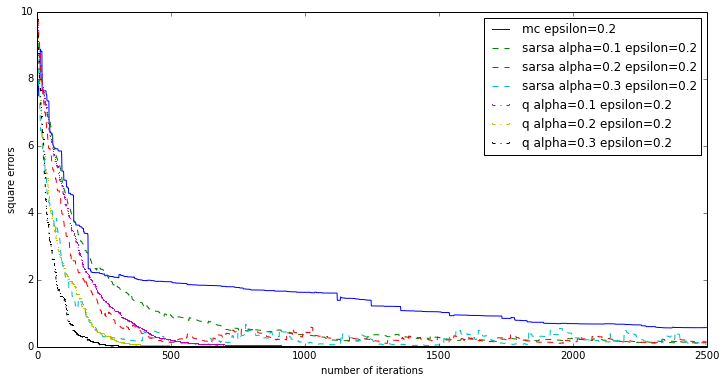

In [18]:
#See various Learning Rate
if __name__ == "__main__":
    read_best()
    plt.figure(figsize=(12,6))

    
    ############# Learning rate ##############
    mc(num_iter1 = 2500, epsilon = 0.2);

    sarsa(num_iter1 = 2500, alpha = 0.1,  epsilon = 0.2); 
    sarsa(num_iter1 = 2500, alpha = 0.2,  epsilon = 0.2);
    sarsa(num_iter1 = 2500, alpha = 0.3,  epsilon = 0.2)

        
    qlearning(num_iter1 = 2500, alpha = 0.1,  epsilon = 0.2);
    qlearning(num_iter1 = 2500, alpha = 0.2,  epsilon = 0.2);
    qlearning(num_iter1 = 2500, alpha = 0.3,  epsilon = 0.2);


    plt.xlabel("number of iterations")
    plt.ylabel("square errors")
    plt.legend()
    plt.show();